# HW1 : Simulate the action potentials generation of a neuron


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

### part 1:
Write a function named ode_euler which will implement a method to solve the sample differential equation. The first argument of this function shoul be a function handle to a differential equation (see the follwoing example for a sample example of f=X^3+X)

In [3]:
def ode_euler(initial_value, time, derivative_function):
    """
    This function calculates the value of a function 'f' using Euler's method.

    Parameters:
    - initial_value: The initial value of the function 'f'.
    - input_x: The input value for the function 'f'.
    - derivative_function: A function representing the derivative of 'f'.

    Returns:
    The calculated value of the function 'f' at the given input using Euler's method.
    """
    
    # Implementation of Euler's method goes here:
    
    calculated_value = np.zeros(len(time))
    calculated_value[0] = initial_value
    for i in range(0,len(time)-1):
        calculated_value[i+1] = calculated_value[i] + (time[i+1] - time[i]) * derivative_function(time[i])
    
    

    return calculated_value


### example :

We want to determine the values of the function 'f' for a range of x values (-10 to 10 with a step size of 0.01)
using knowledge of 'f's derivative with respect to 'x'.

Given function:
    f(x) = x^3 + x

Derivative of 'f' with respect to 'x':
    df/dx = 3x^2 + 1

Initial condition:
    f(x = -10) = -1000

In [4]:

def f_prime(x):
    #defining the derivation function   
    df = 3*x**2 + 1
    
    return df


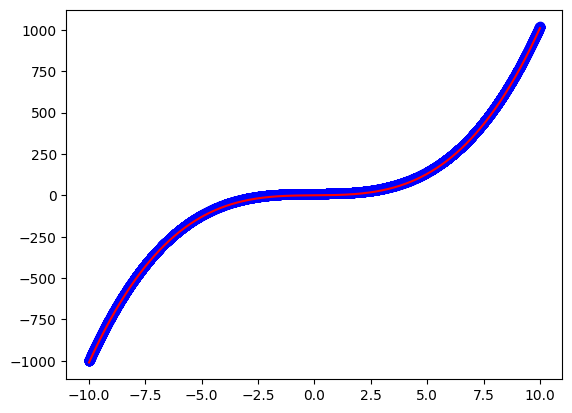

In [5]:
# we want function value from x=-10 to x = 10
x_input = 10 
# initial values : f(-10) = -1000
initial = [-10,-1000] 
# step sizes:
dx = 0.001 
x = np.arange(initial[0],x_input + dx ,dx)
# calculating f directly using its formula:
f2 = x**3 + x
# calculating f from its derivative using euler function:
f = ode_euler(initial[1],x,f_prime)

# comparing calculated fs:
plt.figure()
plt.plot(x,f,'bo')
plt.plot(x,f2,'r')


### part 2:
2-	Write a function n_prime(n_v, V) that calculates the derivative of n at the point n = n_v given that the membrane potential is V.  

In [6]:
def n_prime(n_v, v):
    """ Calculate the derivative of the probability 'n' (channel being open).
        Parameters:
        - n_v: The current value of the probability 'n'.
        - v: The membrane potential.

        Returns:
        The derivative of 'n' with respect to the membrane potential.
    """
    #Your code:
    Ve = v-(-60)
    alpha = (0.01*(10-Ve))/((math.exp((10-Ve)/10))-1)
    beta = 0.125*(math.exp((-Ve)/80))
    dn = (alpha*(1-n_v))-(beta*n_v)

    return dn

### part3: 
Write a function called K_v(t, V) that takes a time interval t and a holding potential V 
and returns the current response of a K+
channel over the time range specified by t.

In [7]:
def modified_ode_euler(initial_value, time, v, derivative_function):
    
    calculated_value = np.zeros(len(time))
    calculated_value[0] = initial_value
    for i in range(0,len(time)-1):
        calculated_value[i+1] = calculated_value[i] + (time[i+1] - time[i]) * derivative_function(calculated_value[i],v)


    return calculated_value


In [8]:
def K_v(t, v):
    #Compute the value of 'n' using the Euler method, then calculate 'ik' using the relevant formula.
    gk = 36
    n = modified_ode_euler(0, t, v, n_prime)
    Vk = v-(-72.1)
    ik = gk*Vk*(n**4)

    return ik

### part4:
Use K_v to plot the current response of a K+
channel when the membrane potential is 
clamped to –30 mV. Repeat this for holding potentials from –40 mV to 70 mV in 10 
mV increments, and plot the solutions on the same graph.

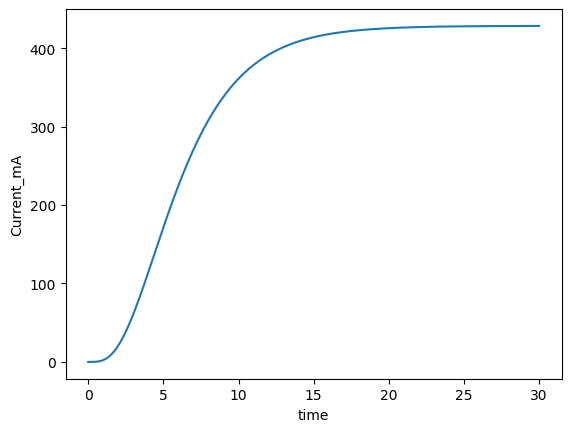

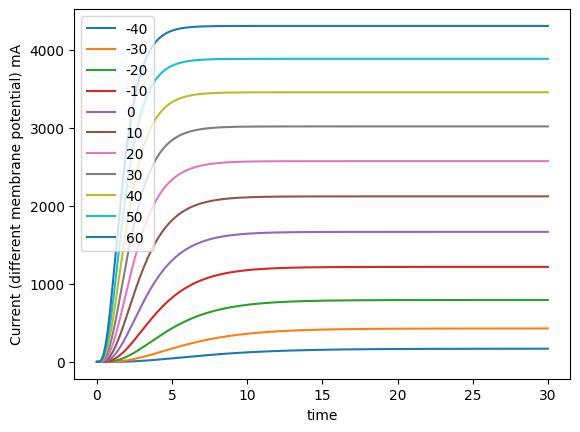

In [9]:
t = 30
v = -30
dt = 0.001

time = np.arange(0 ,t ,dt)
i_k = K_v(time ,v)

plt.plot(time ,i_k)
plt.xlabel('time')
plt.ylabel('Current_mA')
plt.show()

V_hold = np.arange(-40 , 70 , 10)
for i in V_hold :
  i_k = K_v(time ,i)
  plt.plot(time ,i_k)
  plt.xlabel('time')
  plt.ylabel('Current (different membrane potential) mA')
plt.legend(V_hold)

### part5:
Write functions m_prime(m_v, V) and h_prime(h_v, V) that calculate the derivative of m and h at the point m = m_v and h = h_v, given that the membrane potential is V. This will be completely analogous to the code for n_prime.

In [10]:
def m_prime(m_v, v):
    """ Calculate the derivative of the probability 'm' .
        Parameters:
        - m_v: The current value of the probability 'm'.
        - v: The membrane potential.

        Returns:
        The derivative of 'm' with respect to the membrane potential.
    """
    #Your code:
    vna = v-(-60)
    alpham = (0.1 * ( 25 - vna )) / (math.exp((0.1*(25-vna)))-1)
    betam = 4*(math.exp((-vna)/18))
    dm = (alpham*(1-m_v)) - (betam*m_v)
    return dm

In [11]:
def h_prime(h_v, v):
    """ Calculate the derivative of the probability 'h'.
        Parameters:
        - h_v: The current value of the probability 'h'.
        - v: The membrane potential.

        Returns:
        The derivative of 'h' with respect to the membrane potential.
    """
    #Your code:
    vna = v-(-60)
    alphah = 0.07*(math.exp((-vna)/20))
    betah = 1/((math.exp((30-vna)/10))+1)
    dh = (alphah*(1-h_v)) - (betah*(h_v))
    return dh

### part6:
Write a function called Na_v(t, V) that takes a time interval t and a holding potential V, and returns the current response of a Na+channel over the time range specified by t. 

In [12]:
def Na_v(t, v):
    #Compute the value of 'm' and 'h' using the Euler method, then calculate 'ina' using the relevant formula
    Ena = 52.4
    ve = v - Ena
    m = modified_ode_euler(0, t, v , m_prime)
    h = modified_ode_euler(1 , t, v , h_prime)
    gna = 120 * (m ** 3) * h
    ina = gna * ve
    return ina

### part7:
Use Na_v to plot the current response of an Na+ channel when the membrane potential is clamped to –30 mV. Repeat this for holding potentials from –40 mV to 60 mV in 10 mV increments, and plot the solutions on the same graph.

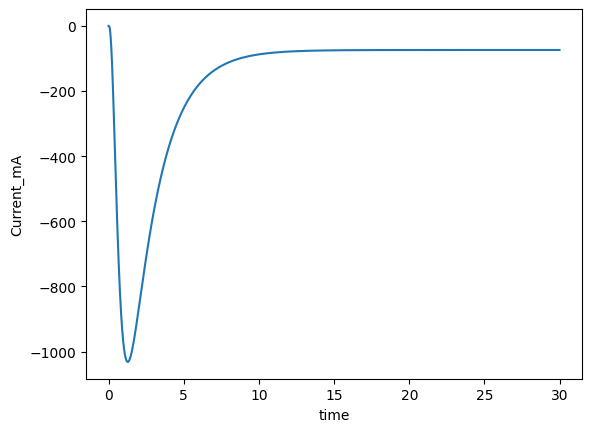

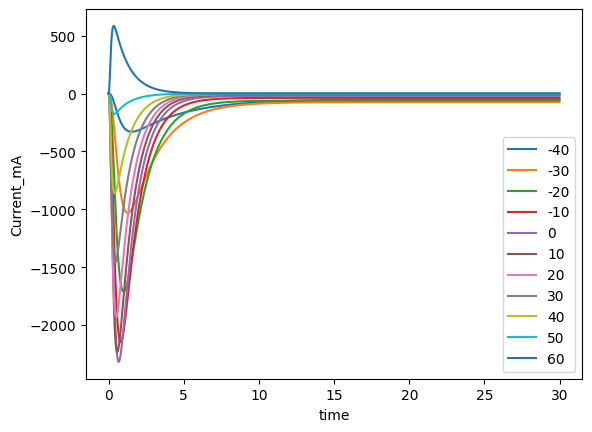

In [13]:
t = np.arange(0,30,0.01)
i_Na = (Na_v(t ,-30))
plt.plot(t , i_Na)
plt.xlabel('time')
plt.ylabel('Current_mA')
plt.show()

V_hold = np.arange(-40 , 70 , 10)
for j in range(len(V_hold)):
  i_Na = Na_v(t ,V_hold[j])
  plt.plot(t , i_Na)
  plt.xlabel('time')
  plt.ylabel('Current_mA')
plt.legend(V_hold)

### part8:
Plot peak current for different voltages and determine peak late current and peak early current.


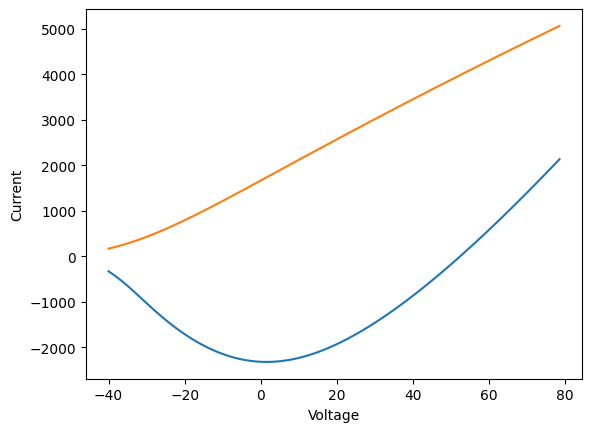

In [14]:
t=np.arange(0,30,0.01)
V=np.arange(-40,80,1.5)
Namaxlist=[]
Kmaxlist=[]
for v in V:
    if v <=52.4 :
        i_K =K_v(t,v)
        i_Na=Na_v(t,v)
        i_Na=np.array(i_Na)
        i_K = np.array(i_K)
        x= -1*(max(abs(i_Na)))
        Namaxlist.append(x)
        Kmaxlist.append(max(i_K))
    else :
        i_Na=Na_v(t,v)
        i_K =K_v(t,v)
        i_Na=np.array(i_Na)
        i_K = np.array(i_K)
        mina= (max(abs(i_Na)))
        Namaxlist.append(mina)
        Kmaxlist.append(max(i_K))

plt.plot(V, Namaxlist)
plt.plot(V, Kmaxlist)
plt.xlabel('Voltage')
plt.ylabel('Current')
plt.show()

### part9:
a)	Write a function hodgkin_huxley(t, I_inj) that takes a time series t and a constant representing injected current and returns the value of V at every point in t. 

In [15]:
def hodgkin_huxley(t,step, I_inj):
  #defining all the necessary parameters
    Cm = 1
    gk = 36
    Ek = -72.1
    gna = 120
    Ena = 52.4
    gl = 0.3
    El = -49.2

    V = -60
    n = 0
    m = 0
    h = 1


    v_values = np.zeros(len(t))

    for i in range(len(t)):

        dV = (I_inj[i] - ( gna * m**3 * h * (V - Ena)) - (gk * n**4 * (V - Ek)) - (gl * (V - El))) / Cm
        dn = n_prime(n , V)
        dh = h_prime(h , V)
        dm = m_prime(m , V)

        V += step * dV
        n += step * dn
        m += step * dm
        h += step * dh

        v_values[i] = V


    return v_values

    

### part 10:
a)	Plot V versus t for injected currents of 5, 10, and 15 A/cm2.

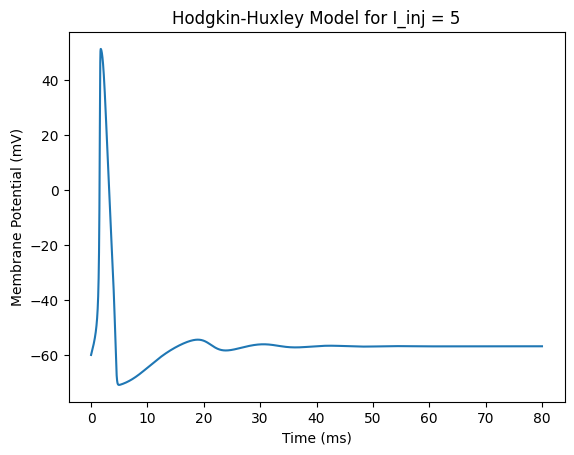

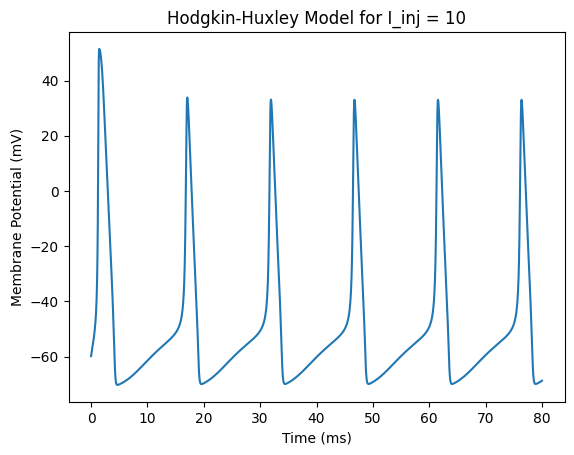

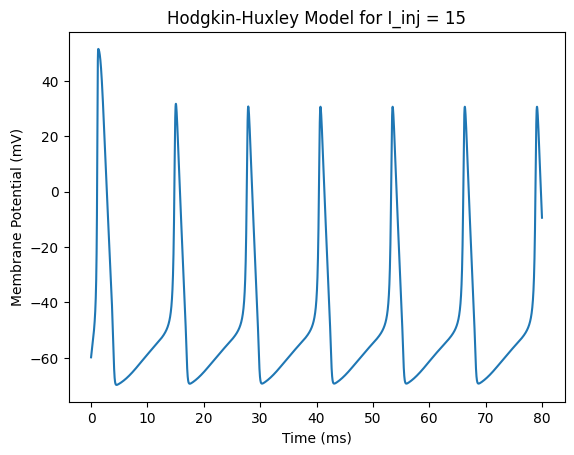

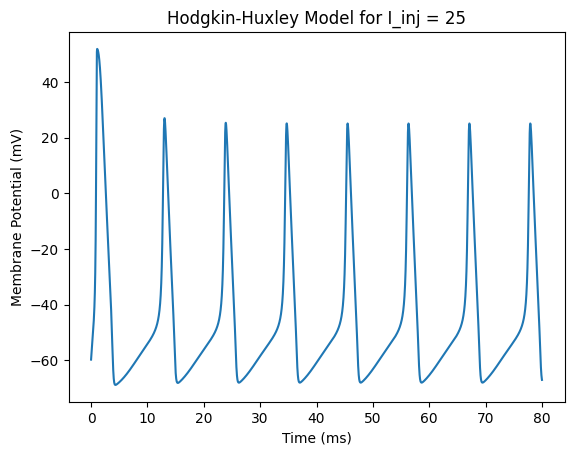

In [16]:
step = 0.01
test_time = np.arange(0, 80, step)

for I in [5, 10, 15,25]:
    injected_current = [I for i in test_time]
    v_values = hodgkin_huxley(test_time, step, injected_current)
    plt.plot(test_time, v_values)
    plt.title(f'Hodgkin-Huxley Model for I_inj = {I}')
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane Potential (mV)')
    plt.show()

### part 11:
In this part we want to simulate the action potentials generation of neuron using FitzHugh-Nagumo 
model which is a simplified 2D version of the Hodgkin–Huxley model. Considering the differential 
equations below, write a function FitzHugh(t, I_inj) that takes a time series t and a constant representing 
injected current and returns the value of V at every point in t.( assume a=0.7 , b=0.8, R = 0.1 and τ = 
12.5) Plot V versus t for injected currents of 3 and 12 A/cm2.

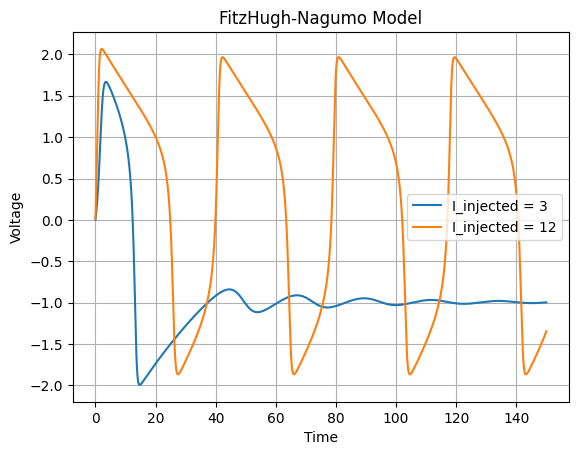

In [17]:
def FitzHugh_Nagumo(t, dt, I_inj):
    # defining all the necessary parameters
    a = 0.7
    b = 0.8
    R = 0.1
    taw = 12.5

    # initial
    v = 0.0
    w = 0.0

    v_values = []

    for i in range(len(t)):
        dv = v - (v**3)/3 - w + R * I_inj
        dw = (v + a - b * w) / taw

        w += step * dw
        v += step * dv
        v_values.append(v)

    return v_values


step = 0.01
t = np.arange(0, 150, step)

I_inj_1 = 3.0
I_inj_2 = 12.0

v_values_1 = FitzHugh_Nagumo(t, step, I_inj_1)
v_values_2 = FitzHugh_Nagumo(t, step, I_inj_2)

plt.plot(t, v_values_1, label='I_injected = 3')
plt.plot(t, v_values_2, label='I_injected = 12')
plt.title('FitzHugh-Nagumo Model')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.legend()
plt.grid(True)
plt.show()

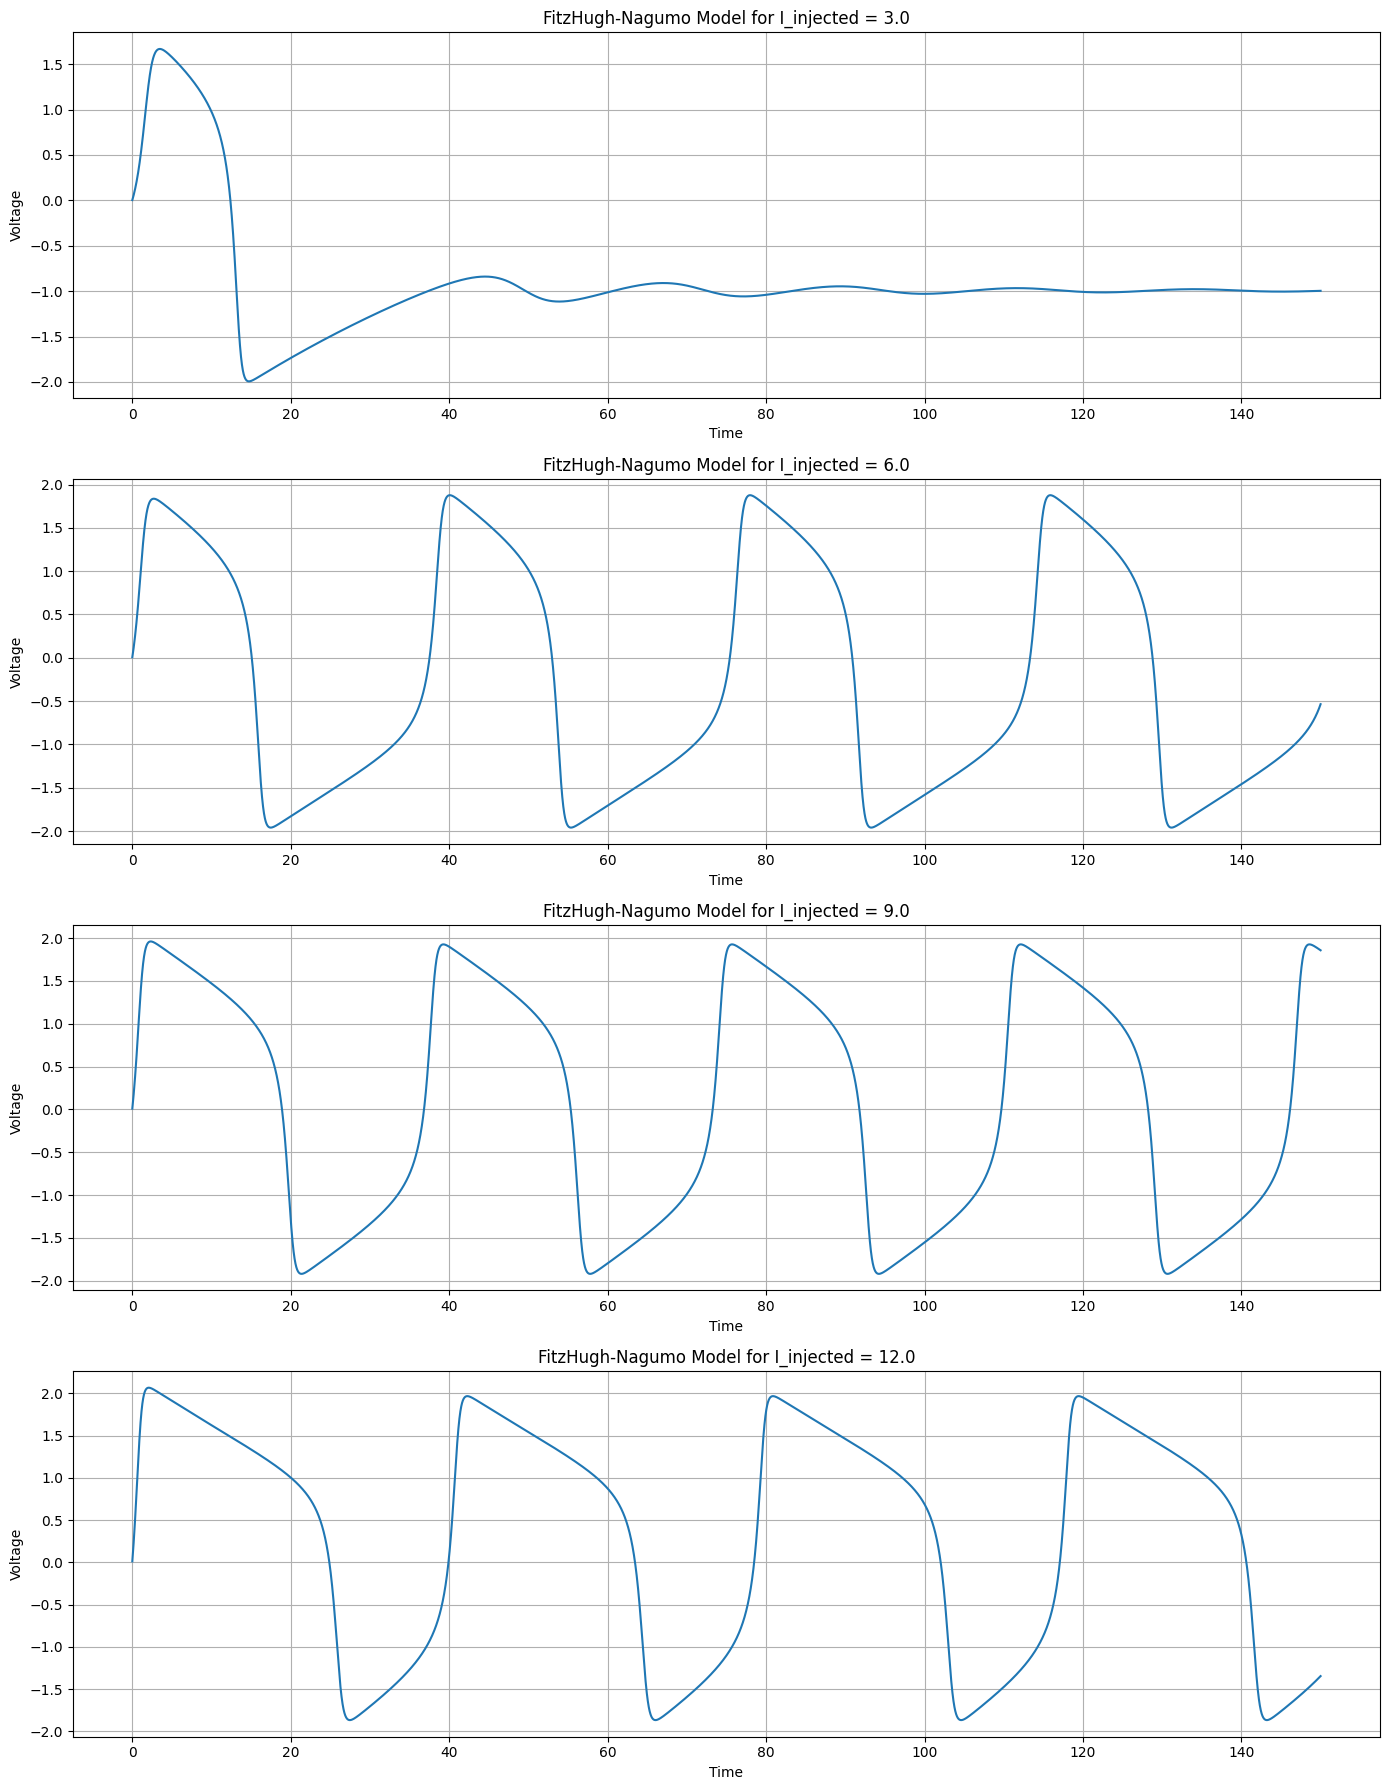

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def FitzHugh_Nagumo(t, dt, I_inj):
    # تعریف تمامی پارامترهای مورد نیاز
    a = 0.7
    b = 0.8
    R = 0.1
    taw = 12.5

    # مقادیر اولیه
    v = 0.0
    w = 0.0

    v_values = []

    for i in range(len(t)):
        dv = v - (v**3)/3 - w + R * I_inj
        dw = (v + a - b * w) / taw

        w += dt * dw
        v += dt * dv
        v_values.append(v)

    return v_values

# پارامترها
step = 0.01
t = np.arange(0, 150, step)

# مقادیر مختلف I_inj
I_inj_values = [3.0, 6.0, 9.0, 12.0]

# تنظیم سابپلات‌ها
num_plots = len(I_inj_values)
fig, axs = plt.subplots(num_plots, 1, figsize=(14, 18))

for idx, I_inj in enumerate(I_inj_values):
    v_values = FitzHugh_Nagumo(t, step, I_inj)
    axs[idx].plot(t, v_values)
    axs[idx].set_title(f'FitzHugh-Nagumo Model for I_injected = {I_inj}')
    axs[idx].set_xlabel('Time')
    axs[idx].set_ylabel('Voltage')
    axs[idx].grid(True)

plt.tight_layout()
plt.show()


### part 12:
So far, we have learned about regular spiking and in this question, we want to simulate bursting type. model for this kind of spiking is a two-dimensional system of ordinary differential equations which is shown below. The parameter ‘a’ controls the rate of recovery of u, and ‘b’ controls the sensitivity of recovery to subthreshold fluctuations of the membrane potential. Plot voltage changes in time for injected current I that shows bursting behavior. (assume a=0.02 and b=0.2)

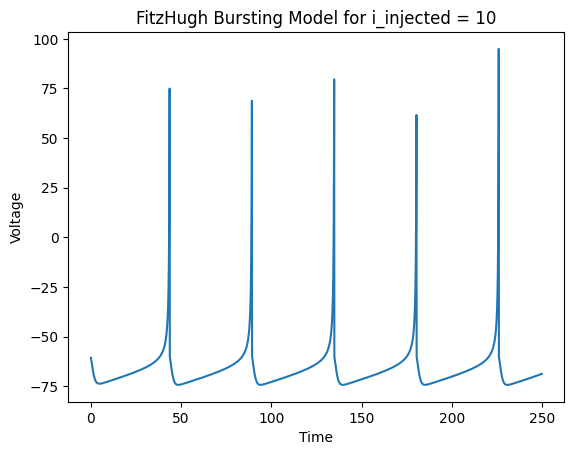

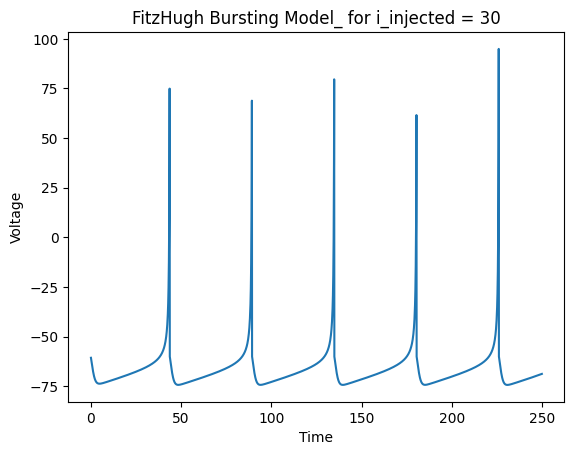

In [19]:
def Bursting(t, step, I_inj, a, b):


    v = -60.0
    u = 0.0
    V_values = []

    for i in range(len(t)):

        dv = 0.04 * v**2 + 5 * v + 140 - u + I_inj
        du = a * (b * v - u)


        v += step * dv
        u += step * du
        if (v>100):
            v = -60
            u += 8


        V_values.append(v)

    return V_values

step = 0.1
t = np.arange(0, 250, step)

a = 0.02
b = 0.2

I_inj_bursting = 10
V_values = Bursting(t, step, I_inj_bursting, a, b)

plt.plot(t, V_values)
plt.title('FitzHugh Bursting Model for i_injected = 10')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.show()

I_inj_bursting = 30
V_value = Bursting(t, step, I_inj_bursting, a, b)
plt.plot(t, V_values)
plt.title('FitzHugh Bursting Model_ for i_injected = 30')
plt.xlabel('Time')
plt.ylabel('Voltage')

plt.show()

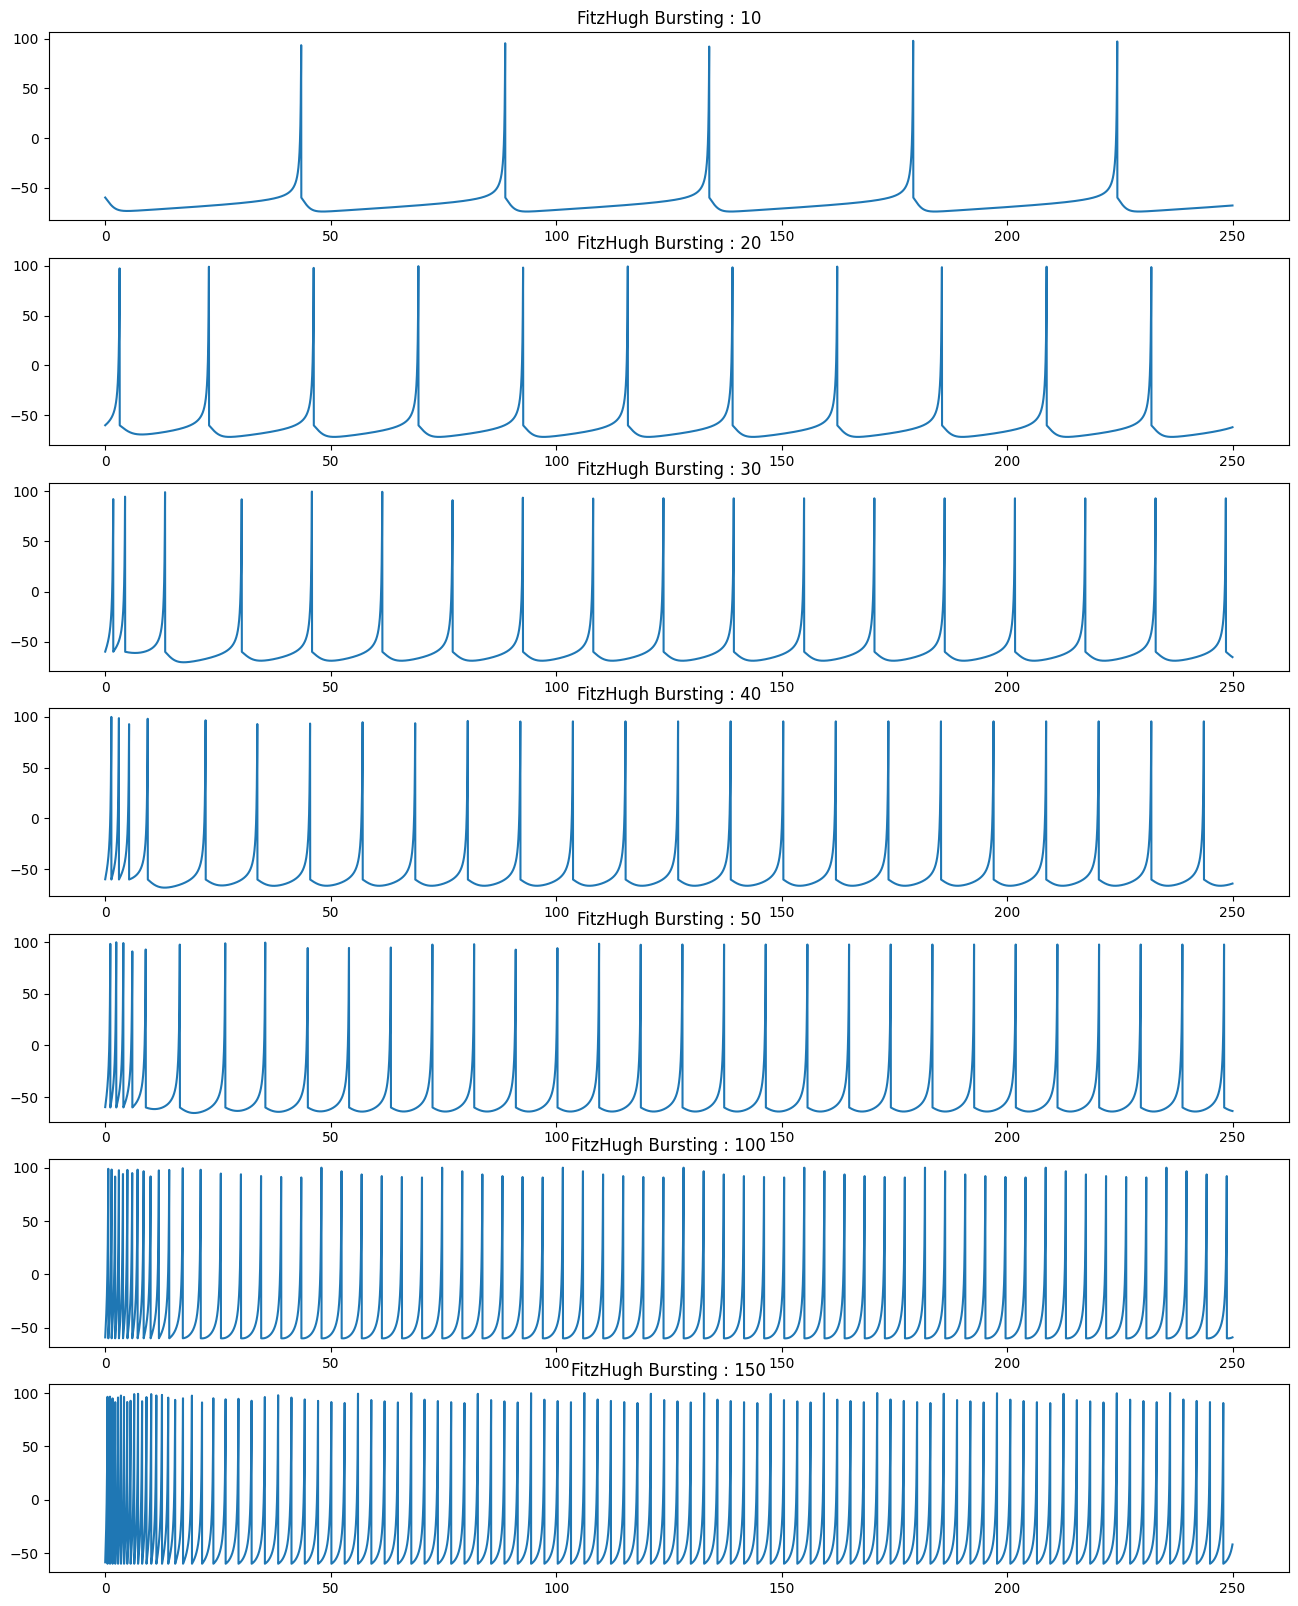

In [20]:
def Bursting(t, step, I_inj, a, b):
    v = -60.0
    u = 0.0
    V_values = []

    for i in range(len(t)):
        dv = 0.04 * v**2 + 5 * v + 140 - u + I_inj
        du = a * (b * v - u)

        v += step * dv
        u += step * du
        
        if v > 100:
            v = -60
            u += 8

        V_values.append(v)

    return V_values


step = 0.01
t = np.arange(0, 250, step)
a = 0.02
b = 0.2


I_inj_bursting_values = [10, 20, 30, 40, 50, 100,150]


num_plots = len(I_inj_bursting_values)
fig, axs = plt.subplots(num_plots, 1, figsize=(16, 20))

for idx, I_inj_bursting in enumerate(I_inj_bursting_values):
    V_values = Bursting(t, step, I_inj_bursting, a, b)
    axs[idx].plot(t, V_values)
    axs[idx].set_title(f'FitzHugh Bursting : {I_inj_bursting}')

### part 13:
Show your great idea

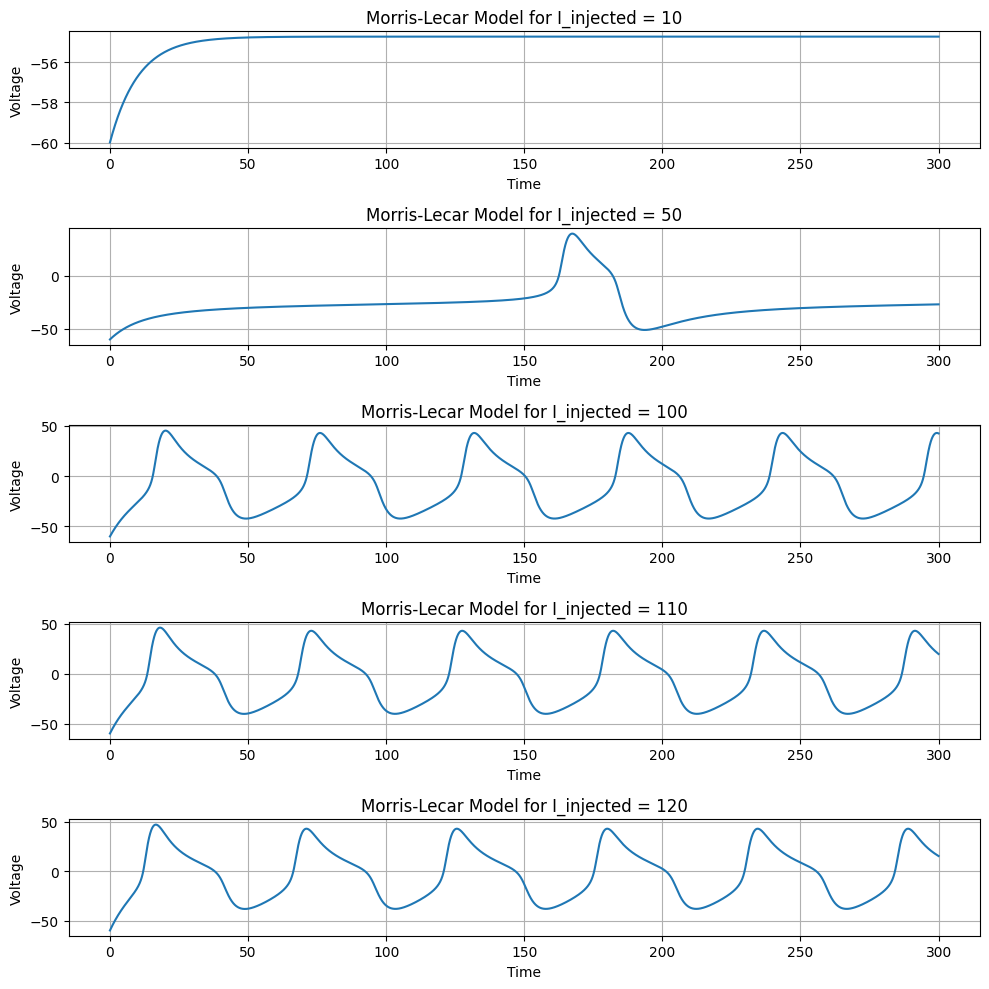

In [24]:
def morris_lecar(t, I, C_m=20, g_Ca=4.4, g_K=8, g_L=2, V_Ca=120, V_K=-84, V_L=-60, phi=0.04):
    def M_inf(V):
        return 0.5 * (1 + np.tanh((V + 1) / 15))

    def W_inf(V):
        return 0.5 * (1 + np.tanh((V - 10) / 14.5))

    def tau_W(V):
        return 1 / np.cosh((V - 10) / (2 * 14.5))

    V = -60.0  
    W = 0.0    

    V_values = []
    W_values = []

    for i in range(len(t)):
        dV = (I - g_Ca * M_inf(V) * (V - V_Ca) - g_K * W * (V - V_K) - g_L * (V - V_L)) / C_m
        dW = phi * (W_inf(V) - W) / tau_W(V)

        V += dV * (t[1] - t[0])
        W += dW * (t[1] - t[0])

        V_values.append(V)
        W_values.append(W)

    return V_values, W_values

# پارامترها
step = 0.01
t = np.arange(0, 300, step)

# مقادیر مختلف I_inj
I_inj_values = [10,50,100,110,120]

# تنظیم سابپلات‌ها
num_plots = len(I_inj_values)
fig, axs = plt.subplots(num_plots, 1, figsize=(10, 2 * num_plots))

for idx, I_inj in enumerate(I_inj_values):
    V_values, W_values = morris_lecar(t, I_inj)
    axs[idx].plot(t, V_values)
    axs[idx].set_title(f'Morris-Lecar Model for I_injected = {I_inj}')
    axs[idx].set_xlabel('Time')
    axs[idx].set_ylabel('Voltage')
    axs[idx].grid(True)

plt.tight_layout()
plt.show()
